In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
import scipy.stats as stats
plt.rcParams['axes.grid'] = True # Turns grid lines on globally
%matplotlib inline

In [2]:
data = pd.read_excel('FFTwithStat.xlsx')
pd.set_option('display.max_rows', len(data))

In [3]:
data

,time,y(t)
0,0.00000,2.150000
1,0.03125,3.662380
2,0.06250,0.423609
3,0.09375,-0.108527
4,0.12500,0.637868
5,0.15625,-0.505806
6,0.18750,0.031640
7,0.21875,-0.216671
8,0.25000,-0.150000
9,0.28125,3.027812


In [4]:
y = data.loc[::,'y(t)']
Yfft = fft.fft(y)
Yave = np.mean(y)
print('Average y(t) = ',Yave)
Ystd = np.std(y)
print('Standard Deviation of y(t) = ',Ystd)
yRMS = np.sqrt(Yave**2+Ystd**2)
print('RMS = ',yRMS)

Average y(t) =  0.8499999999999998
Standard Deviation of y(t) =  1.3228756555322954
RMS =  1.5724185193516387


In [5]:
sf = 1/data.time[1]
print('Sampling Frequency = ',sf,'Hz')

Sampling Frequency =  32.0 Hz


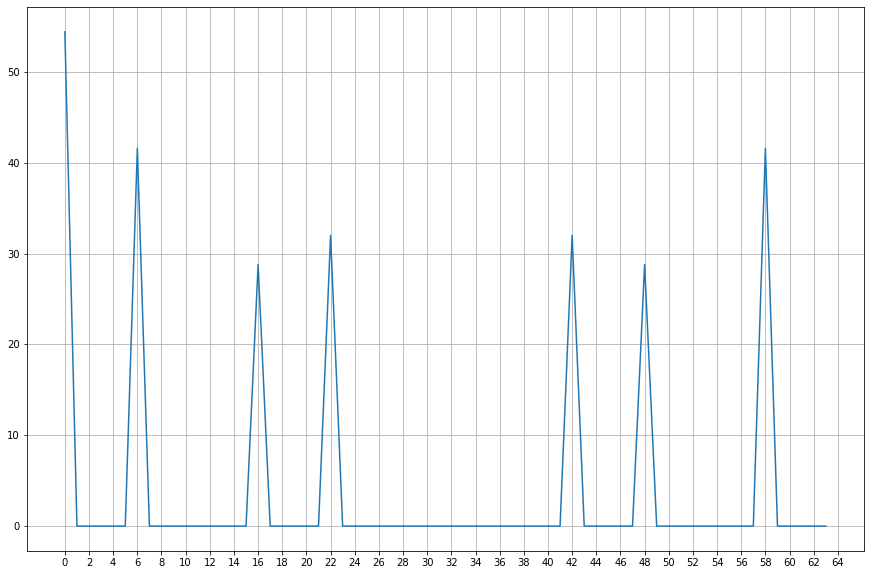

0     54.400000+0.000000j
1      0.000000-0.000000j
2     -0.000000+0.000000j
3     -0.000000+0.000000j
4     -0.000000-0.000000j
5      0.000000-0.000000j
6     41.600000-0.000000j
7      0.000000-0.000000j
8      0.000000+0.000000j
9     -0.000000+0.000000j
10     0.000000+0.000000j
11     0.000000+0.000000j
12     0.000000+0.000000j
13     0.000000+0.000000j
14     0.000000+0.000000j
15     0.000000+0.000000j
16   -0.000000-28.800000j
17    -0.000000+0.000000j
18     0.000000+0.000000j
19     0.000000+0.000000j
20     0.000000+0.000000j
21     0.000000+0.000000j
22   -0.000000-32.000000j
23    -0.000000-0.000000j
24     0.000000-0.000000j
25     0.000000-0.000000j
26     0.000000-0.000000j
27     0.000000-0.000000j
28     0.000000-0.000000j
29    -0.000000-0.000000j
30     0.000000-0.000000j
31     0.000000+0.000000j
32     0.000000+0.000000j
33     0.000000-0.000000j
34     0.000000+0.000000j
35    -0.000000+0.000000j
36     0.000000+0.000000j
37     0.000000+0.000000j
38     0.000

In [6]:
fig1,ax = plt.subplots(figsize = [15,10])
N = len(data)
ax.plot(np.arange(0,64,1),np.abs(Yfft))
ax.set_xticks(np.arange(0,66,2))
plt.show()
for value,i in zip(Yfft,range(N)):
    data.loc[i,'Yfft'] = round(value,10)
print(data.Yfft)


In [7]:
pi = np.pi
N = len(data)
DC = data.Yfft[0].real/N
A1 = data.Yfft[6].real/N*2
A2 = np.abs(data.Yfft[16].imag/N*2)
A3 = np.abs(data.Yfft[22].imag/N*2)

In [8]:
print('DC = ',DC,'\nA1 = ',A1,'\nA2',A2,'\nA3',A3)

DC =  0.85 
A1 =  1.3 
A2 0.9 
A3 1.0


In [9]:
deltaf = sf/N
f1 = deltaf*6
f2 = deltaf*16
f3 = deltaf*22
print('f1 = ',f1,'\nf2 = ',f2,'\nf3 = ',f3)

f1 =  3.0 
f2 =  8.0 
f3 =  11.0


In [10]:
(1/5 -.2)/.2

0.0